In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

2023-11-08 15:45:56.642235: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-08 15:45:56.670323: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-08 15:45:56.670352: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-08 15:45:56.670379: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-08 15:45:56.675629: I tensorflow/core/platform/cpu_feature_g

### Read the data
for data visualization go to continuous forecast as it is the same

In [2]:
file_path = 'data/PLTR_diff.csv'
target_column_name = 'Close Diff'

pltr = pd.read_csv(file_path, index_col=0, parse_dates=True)
pltr.dropna(inplace=True)
pltr.shape

(2315, 22)

In [3]:
def classify_diff(close_diff):
    if close_diff > 0.2:
        return 'B'  # Class B
    elif close_diff < -0.1:
        return 'C'  # Class C
    else:
        return 'A'  # Class A

pltr['Class'] = pltr[target_column_name].apply(classify_diff)

# Encode class labels to integers
class_mapping = {'A': 0, 'B': 1, 'C': 2}
pltr['Class'] = pltr['Class'].map(class_mapping)
num_classes = len(class_mapping)

In [7]:
features = pltr.drop(columns=[target_column_name, 'Class'])
target = pltr['Class'].values

scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(features)

# Convert target to one-hot encoding
target_categorical = to_categorical(target)

# Split the data into training and testing sets
train_features, test_features, train_target, test_target = train_test_split(features_scaled, target_categorical, test_size=0.2, random_state=42)

/usr/lib/python3/dist-packages/sklearn/utils/validation.py:507: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):
/usr/lib/python3/dist-packages/sklearn/utils/validation.py:507: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  array.dtypes.apply(is_sparse).any()):


In [8]:
train_target

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]], dtype=float32)

In [9]:
############################################################################################################
#
# Model Definition
#
############################################################################################################

def build_classification_model(input_shape, num_classes):
    model = keras.Sequential()
    model.add(keras.layers.Dense(50, input_shape=(input_shape,), activation='relu'))
    model.add(keras.layers.Dropout(0.2))
    model.add(keras.layers.Dense(50))
    model.add(keras.layers.Dense(units=num_classes, activation='softmax'))
    return model

model = build_classification_model(input_shape=train_features.shape[1], num_classes=num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

############################################################################################################
#
# Model Generation & Training
#
############################################################################################################
epochs = 400
batch_size = 256

history = model.fit(train_features, train_target, epochs=epochs, batch_size=batch_size, verbose=2, validation_split=0.1)

Epoch 1/400


2023-11-08 15:46:43.167716: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_UNKNOWN: unknown error
2023-11-08 15:46:43.167740: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: andrea
2023-11-08 15:46:43.167745: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: andrea
2023-11-08 15:46:43.167892: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: 535.129.3
2023-11-08 15:46:43.167903: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.129.3
2023-11-08 15:46:43.167906: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:309] kernel version seems to match DSO: 535.129.3


7/7 - 1s - loss: 1.1250 - accuracy: 0.3373 - val_loss: 0.7640 - val_accuracy: 0.9409 - 516ms/epoch - 74ms/step
Epoch 2/400
7/7 - 0s - loss: 0.6081 - accuracy: 0.9424 - val_loss: 0.4140 - val_accuracy: 0.9409 - 28ms/epoch - 4ms/step
Epoch 3/400
7/7 - 0s - loss: 0.3502 - accuracy: 0.9442 - val_loss: 0.2857 - val_accuracy: 0.9409 - 25ms/epoch - 4ms/step
Epoch 4/400
7/7 - 0s - loss: 0.2675 - accuracy: 0.9442 - val_loss: 0.2622 - val_accuracy: 0.9409 - 26ms/epoch - 4ms/step
Epoch 5/400
7/7 - 0s - loss: 0.2528 - accuracy: 0.9442 - val_loss: 0.2591 - val_accuracy: 0.9409 - 30ms/epoch - 4ms/step
Epoch 6/400
7/7 - 0s - loss: 0.2480 - accuracy: 0.9442 - val_loss: 0.2536 - val_accuracy: 0.9409 - 28ms/epoch - 4ms/step
Epoch 7/400
7/7 - 0s - loss: 0.2426 - accuracy: 0.9442 - val_loss: 0.2438 - val_accuracy: 0.9409 - 28ms/epoch - 4ms/step
Epoch 8/400
7/7 - 0s - loss: 0.2367 - accuracy: 0.9442 - val_loss: 0.2372 - val_accuracy: 0.9409 - 27ms/epoch - 4ms/step
Epoch 9/400
7/7 - 0s - loss: 0.2403 - accu

15/15 [==============================] - 0s 799us/step - loss: 0.0690 - accuracy: 0.9654
Test accuracy: 0.9654427766799927


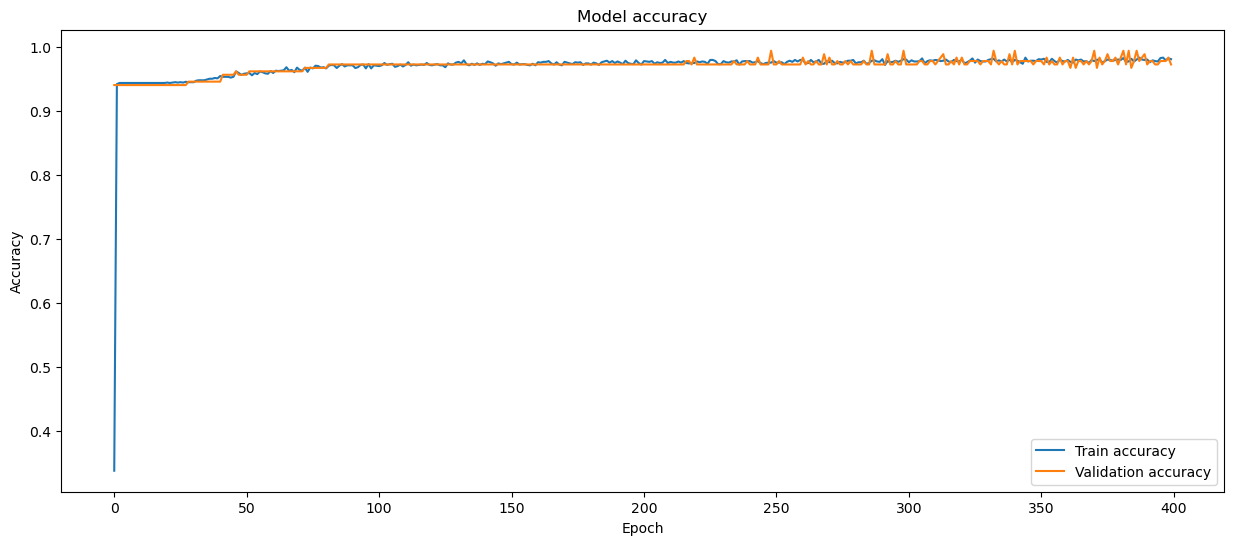

In [10]:
# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(test_features, test_target)
print(f'Test accuracy: {test_accuracy}')

# Plot training & validation accuracy values
plt.figure(figsize=(15, 6))
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.show()


 1/15 [=>............................] - ETA: 0s

15/15 [==============================] - 0s 822us/step
Confusion Matrix:
[[435   1   1]
 [  5   1   0]
 [  9   0  11]]
Class 0 Metrics:
True Positives (TP): 435
False Positives (FP): 14
True Negatives (TN): 12
False Negatives (FN): 2


Class 1 Metrics:
True Positives (TP): 1
False Positives (FP): 1
True Negatives (TN): 456
False Negatives (FN): 5


Class 2 Metrics:
True Positives (TP): 11
False Positives (FP): 1
True Negatives (TN): 442
False Negatives (FN): 9




ValueError: x and y must be the same size

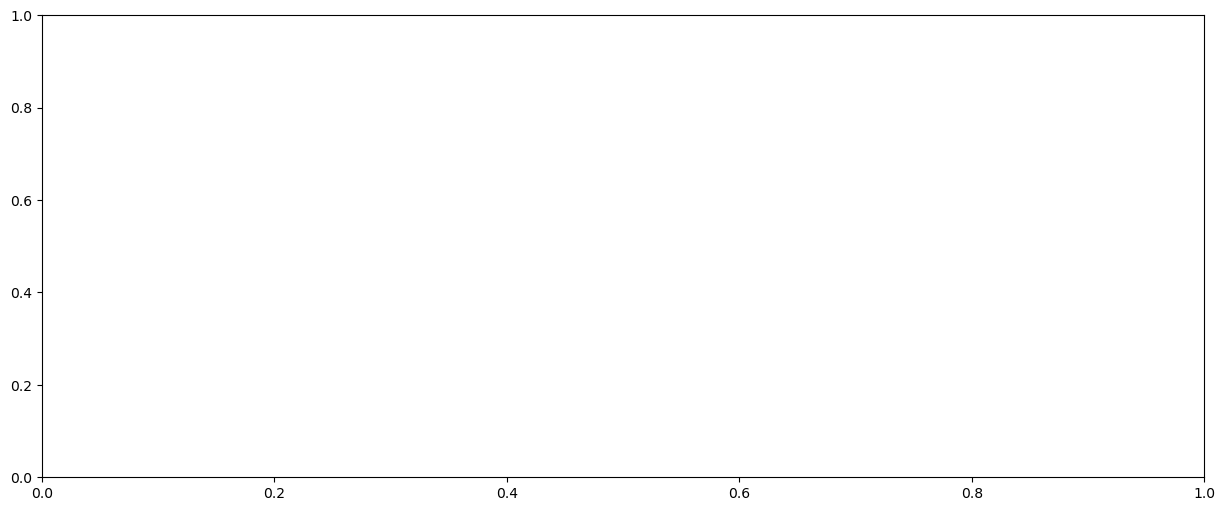

In [16]:
predictions = model.predict(test_features)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(test_target, axis=1)

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)

print("Confusion Matrix:")
print(cm)

# Calculate TP, FP, TN, FN for each class
for i in range(num_classes):  # Assuming num_classes is the number of classes
    tp = cm[i, i]
    fp = cm[:, i].sum() - tp
    fn = cm[i, :].sum() - tp
    tn = cm.sum() - (fp + fn + tp)

    print(f"Class {i} Metrics:")
    print(f"True Positives (TP): {tp}")
    print(f"False Positives (FP): {fp}")
    print(f"True Negatives (TN): {tn}")
    print(f"False Negatives (FN): {fn}")
    print("\n")


plt.figure(figsize=(15, 6))
plt.scatter(len(true_classes), true_classes, label='True class')
# plt.scatter(len(predicted_classes), predicted_classes, label='Forecast')
plt.title('Classification Otput')
plt.ylabel('Classes')
plt.xlabel('Time Steps')
plt.legend()
plt.show()

In [13]:
len(true_classes)

463

In [15]:
len(predicted_classes)

463